Interactive Visualizations:

Original Datase:

- https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

------------------------------------------
# i. Data Loading

### Import library:

In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML

C:\Users\fahri\AppData\Local\Temp\ipykernel_13016\1783703635.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### Load dataset:

In [3]:
df = pd.read_csv(r"C:\Users\fahri\OneDrive\Desktop\Playgr\[98] datasets\Sample - Superstore.csv", encoding='latin1')

### Preview dataset:

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
pd.set_option('display.max_columns', None)
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2422,2423,CA-2016-155551,4/18/2016,4/23/2016,Standard Class,CR-12580,Clay Rozendal,Home Office,United States,Elmhurst,Illinois,60126,Central,OFF-PA-10001560,Office Supplies,Paper,"Adams Telephone Message Books, 5 1/4 x 11",9.664,2,0.2,3.2616
7452,7453,CA-2017-105669,9/17/2017,9/22/2017,Second Class,SJ-20125,Sanjit Jacobs,Home Office,United States,Houston,Texas,77036,Central,TEC-PH-10002415,Technology,Phones,Polycom VoiceStation 500 Conference phone,1415.760,6,0.2,88.4850
998,999,CA-2015-162537,10/28/2015,11/3/2015,Standard Class,RD-19585,Rob Dowd,Consumer,United States,Henderson,Kentucky,42420,South,FUR-FU-10002885,Furniture,Furnishings,Magna Visual Magnetic Picture Hangers,24.100,5,0.0,9.1580
2363,2364,US-2016-108637,3/13/2016,3/18/2016,Standard Class,AB-10060,Adam Bellavance,Home Office,United States,Waynesboro,Virginia,22980,South,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",127.880,2,0.0,40.9216
2103,2104,CA-2017-167101,3/24/2017,3/28/2017,Second Class,BM-11650,Brian Moss,Corporate,United States,New York City,New York,10009,East,OFF-PA-10000357,Office Supplies,Paper,Xerox 1888,221.920,4,0.0,106.5216


*The dataset has 20 entries that consist of:*

    Row ID          : Unique ID for each row.
    Order ID        : Unique Order ID for each Customer.
    Order Date      : Order Date of the product.
    Ship Date       : Shipping Date of the Product.
    Ship Mode       : Shipping Mode specified by the Customer.
    Customer ID     : Unique ID to identify each Customer.
    Customer Name   : Name of the Customer.
    Segment         : The segment where the Customer belongs.
    Country         : Country of residence of the Customer.
    City            : City of residence of of the Customer.
    State           : State of residence of the Customer.
    Postal Code     : Postal Code of every Customer.
    Region          : Region where the Customer belong.
    Product ID      : Unique ID of the Product.
    Category        : Category of the product ordered.
    Sub-Category    : Sub-Category of the product ordered.
    Product Name    : Name of the Product
    Sales           : Sales of the Product.
    Quantity        : Quantity of the Product.
    Discount        : Discount provided.
    Profit          : Profit/Loss incurred.

### Structure and data format

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

*Several data types are not match the actual data, such as `Order Date` & `Ship Date`.*

*The discount column needs to be clarified whether it is in percentage units or not.*

*Plausible to drop some columns, such as `Row ID`.*

In [14]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.describe(include="object")

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [9]:
df.shape

(9994, 21)

*Based on a quick glance, the dataset looks fine except for minus value in profit which needs to specified further*

-----------------------------------------------
# ii. Data Cleaning

### Missing Values Handling

In [15]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

Row ID           0.0
Postal Code      0.0
Discount         0.0
Quantity         0.0
Sales            0.0
Product Name     0.0
Sub-Category     0.0
Category         0.0
Product ID       0.0
Region           0.0
State            0.0
Order ID         0.0
City             0.0
Country          0.0
Segment          0.0
Customer Name    0.0
Customer ID      0.0
Ship Mode        0.0
Ship Date        0.0
Order Date       0.0
Profit           0.0
dtype: float64

In [16]:
df.isna().sum().sort_values(ascending=False)/len(df)*100

Row ID           0.0
Postal Code      0.0
Discount         0.0
Quantity         0.0
Sales            0.0
Product Name     0.0
Sub-Category     0.0
Category         0.0
Product ID       0.0
Region           0.0
State            0.0
Order ID         0.0
City             0.0
Country          0.0
Segment          0.0
Customer Name    0.0
Customer ID      0.0
Ship Mode        0.0
Ship Date        0.0
Order Date       0.0
Profit           0.0
dtype: float64

*No missing values*

### Duplicates Handling

In [11]:
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


*No duplicated values*

### Inconsistent Format Handling

Changing Dates columns data types from object to Datetime

In [ ]:
df['Order Date'] = df['Order Date'].astype('datetime64[ns]')
df['Ship Date'] = df['Ship Date'].astype('datetime64[ns]')

In [ ]:
#df['year'] = df['date_added'].dt.year

                                        *cek apakah butuh bulanan & tahunan*

### Cleaning Individual Columns

In [23]:
df.sample(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3283,3284,CA-2014-159478,2014-09-30,2014-10-06,Standard Class,MH-17785,Maya Herman,Corporate,United States,New York City,New York,10035,East,FUR-FU-10000221,Furniture,Furnishings,"Master Caster Door Stop, Brown",15.24,3,0.0,5.1816
7752,7753,CA-2015-133242,2015-06-18,2015-06-24,Standard Class,KH-16510,Keith Herrera,Consumer,United States,Arlington,Virginia,22204,South,OFF-BI-10004826,Office Supplies,Binders,JM Magazine Binder,33.02,2,0.0,15.8496


In [26]:
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [28]:
df["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [44]:
df["Country"].unique()

array(['United States'], dtype=object)

In [31]:
#df["Category"].unique()
df["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [35]:
df["Discount"].unique()
df["Discount"].mean()

0.15620272163298934

** diskon kayanya belum dikali 100

In [39]:
df[(df['Quantity'] < 0)]
df[(df['Sales'] < 0)]
df[(df['Discount'] < 0)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


### Other transformations

drop row id
drop segment
drop country
drop postal code

In [45]:
df = df.drop(columns=['Row ID', 'Segment', 'Country', 'Postal Code'])

*some columns are dropped because they are not needed for the analysis*

--------

In [ ]:
#df.to_csv('csv')

*Saving the cleaned dataset for visualization in Tableau.*

--------------------------
# iii. Profit Analysis

### Which city has the highest profit?

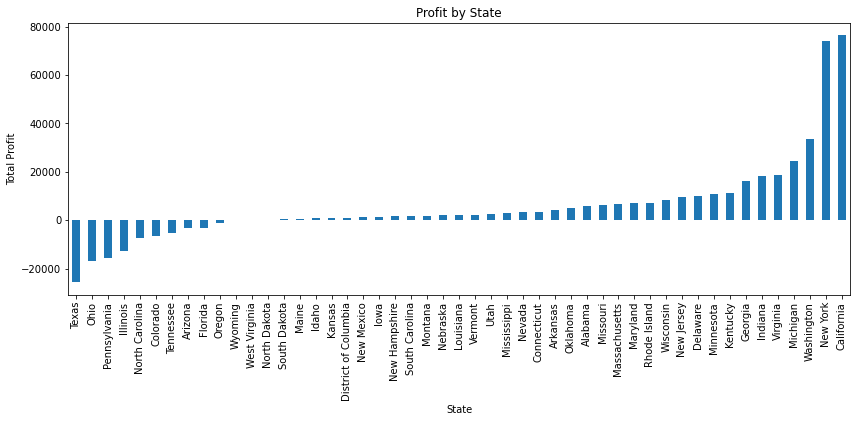

In [56]:
# Grouping profit by according its state
profit_per_state = df.groupby('State')['Profit'].sum().sort_values()

# Creating barplot using matplotlib
plt.figure(figsize=(14, 5))
profit_per_state.plot(kind='bar')

# Adding legend to plot
plt.title('Profit by State')
plt.ylabel('Total Profit')
plt.show()

*Dari barchart diatas, dapat terlihat bahwa *

### Which categories & sub-categories has the highest profit?

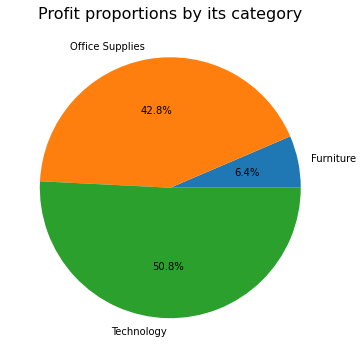

In [95]:
# Grouping profit by according its category
profit_per_category = df.groupby('Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=True)

# Creating a figure
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('white')

# Creating piechart using plt
plt.pie(profit_per_category['Profit'], labels=profit_per_category['Category'], autopct='%1.1f%%')
plt.title('Profit proportions by its category', fontsize=16)

# Creating barplot using seaborn
#sns.barplot(data=profit_per_category, x='Category', y='Profit', orient='v')

# Inserting data value
#ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge', fontsize=10)

# Adding legend to plot
#ax.set_ylabel('Category')
#ylabels = ['{:,.2f}'.format(y) for y in ax.get_yticks()/1]
#ax.set_yticklabels(labels = ylabels)
#ax.set_title('Total profit by its category')
#ax.legend()
plt.show()

*Dari chart diatas, dapat terlihat bahwa *

C:\Users\fahri\AppData\Local\Temp\ipykernel_13016\1101036082.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels = ylabels)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


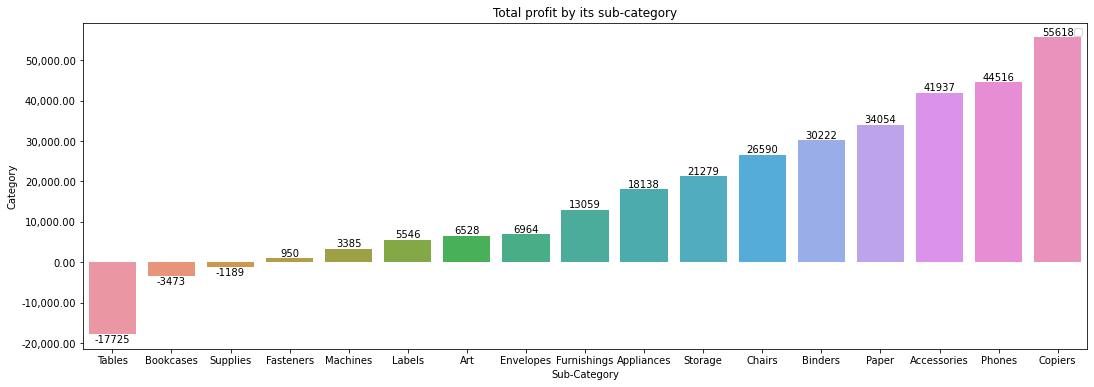

In [69]:
# Grouping profit by according its sub-category
profit_per_sub_category = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=True)

# Creating a figure
fig, ax = plt.subplots(figsize=(18, 6))

# Creating barplot using seaborn
sns.barplot(data=profit_per_sub_category, x='Sub-Category', y='Profit', orient='v')

# menambahkan data value
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge', fontsize=10)

# Adding legend to plot
ax.set_ylabel('Category')
ylabels = ['{:,.2f}'.format(y) for y in ax.get_yticks()/1]
ax.set_yticklabels(labels = ylabels)
ax.set_title('Total profit by its sub-category')
ax.legend()
plt.show()

*Dari barchart diatas, dapat terlihat bahwa *

### Which Ship Mode has the highest profit?

C:\Users\fahri\AppData\Local\Temp\ipykernel_13016\558490794.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels = ylabels)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


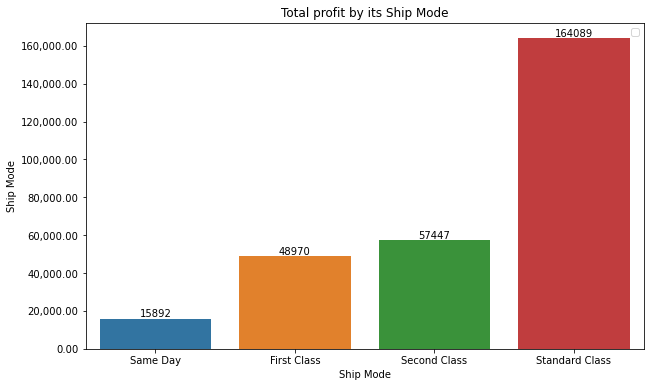

In [78]:
# Grouping profit by according its mode of shipping
profit_per_ship_mode = df.groupby('Ship Mode')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=True)

# Creating a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Creating barplot using seaborn
sns.barplot(data=profit_per_ship_mode, x='Ship Mode', y='Profit', orient='v')

# menambahkan data value
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge', fontsize=10)

# Adding legend to plot
ax.set_ylabel('Ship Mode')
ylabels = ['{:,.2f}'.format(y) for y in ax.get_yticks()/1]
ax.set_yticklabels(labels = ylabels)
ax.set_title('Total profit by its Ship Mode')
ax.legend()
plt.show()

*Dari barchart diatas, dapat terlihat bahwa *

-------------------------------
# vi. Conclusions

Berdasarkan analisa diatas, didapat bahwa:

Jika dilihat dari tipe properti, penjualan terbanyak adalah ditempati oleh House (78.475) sementara Farmhouse merupakan properti dengan rata-rata harga paling tinggi meskipun hanya 501 yang terjual.

Berdasarkan kota nya, rata-rata harga properti paling mahal berada di kota Lahore, jumlah properti paling banyak berada di karachi sementara properti yang rata-rata luasnya paling tinggi berada di Islamabad. Hampir di masing-masing kota, House tetap menjadi properti paling banyak terjual dengan lahore menjadi penyumbang terbanyak. Di karachi, House berada di peringkat ke 2 setelah Flat dengan selisih +- 300 unit.

Dilihat dari segi waktu, semua properti mengalami kenaikan pada bulan Mei 2019. 

Dari pengujian statistik deskriptif, diketahui bahwa distribusi harga memiliki tipe positive skew dengan nilai outlier pada harga-harga tinggi. Selain itu, tidak ditemukan nilai yang kuat antara area, jumlah bathrooms dan jumlah bedrooms ketika diuji korelasi dengan harga.

Rata-rata sales bulanan dari karachi (kota dengan properti paling banyak) dan lahore (kota dengan properti paling mahal) coba diuji melalui statistik inferensial, yaitu t-test. Didapatkan bahwa tidak ada cukup data untuk membuktikan bahwa rata-rata sales di Karachi sama dengan rata-rata sales di Lahore.

Rekomendasi:

1. Berdasarkan demand-nya, perusahaan real estate sebaiknya fokus berinvestasi di lahore dan karachi, terutama pada tipe House.
2. Berinvestasi di islamabad jika fokus real-estate besar.
3. Berinvestasi pada pembangunan famhouse dengan fokus real-estate mahal.
4. Dengan harga nya yang terjangkau, perusahan dapat melakukan up-selling untuk room & portion untuk mahasiswa dan pekerja muda yang belum berkeluarga dengan opsi buy-back.
5. Memperhatikan kebijakan dan pembangunan infrastrukur serta trend dari demand secara berkala untuk mengetahui hotspot area baru, seperti Flat di Karachi yang mulai mengalahkan House.

Rekomendasi tambahan:

1. Analisa selanjutnya dapat dilakukan perihal kondisi dari properti dan akses menuju fasilitas penunjang seperti pasar dan stasiun.
2. Dengan rata-rata pendapatan 82.100 PKR per bulan, penawaran perihal metode pembayaran dengan jangka panjang perlu dipertimbangkan untuk memperluas jangkauan customer. Dengan terlebih dahulu mengkaji risikonya.
3. Perusahaan dapat melakukan promosi di media online (seperti `Zameen.com`) untuk meraih potential customer lebih luas dan cepat, serta berdasarkan segmennya.